# What is Sentiment Analysis?

Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.

In sentiment analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs, and verbs, for example: “I love this camera. It’s amazing!”

Opinion words are also known as polarity words, sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

### Importing the required libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
data = pd.read_csv("Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

### Now let’s visualize the distribution of the data

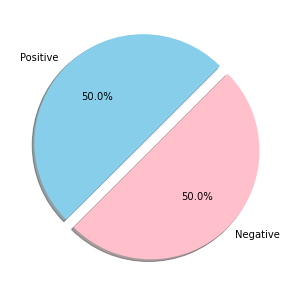

In [2]:
fig = plt.figure(figsize=(5, 5))
colors = ["skyblue", "pink"]
pos = data[data['label']==1]
neg = data[data['label']==0]
ck = [pos['label'].count(), neg['label'].count()]
legpie=plt.pie(ck, labels=['Positive', 'Negative'],
              autopct = '%1.1f%%',
              shadow=True,
              colors = colors,
              startangle =45,
              explode=(0, 0.1))

Then we will import RE, that is, the regular expression operation, we use this library to remove html tags like ‘a’ or. So whenever we come across these tags, we replace them with an empty string. Then we will also modify the emojis/emoticons which can be smileys :), a sad face: (or even an upset face: /. We will change the emojis towards the end to get a clean set of text

In [3]:
import re
def preprocessor(text):
    text=re.sub('<[^>]', '', text)
    emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text=re.sub('[\W]+', ' ', text.lower())+\
    ' '.join(emojis).replace('-', '')
    return text

data['text']=data['text'].apply(preprocessor)

### Now, I’ll be using nltk’s PorterStemmer to simplify the data and remove unnecessary complexities in our text data

In [4]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

### Visualizing Negative and Positive Words
To visualzie the negative and postive words using a wordcloud, I will first remove the stopwords:

[nltk_data] Downloading package stopwords to C:\Users\Sudarshan
[nltk_data]     Kadge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


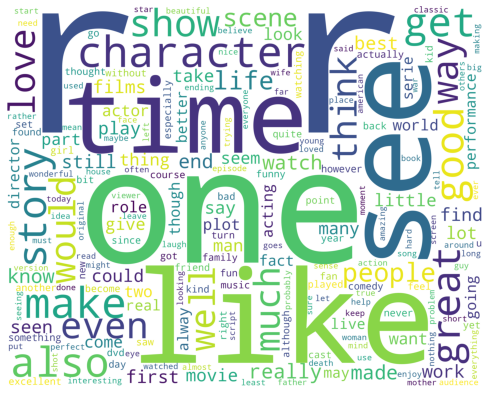

Negative words are as follows


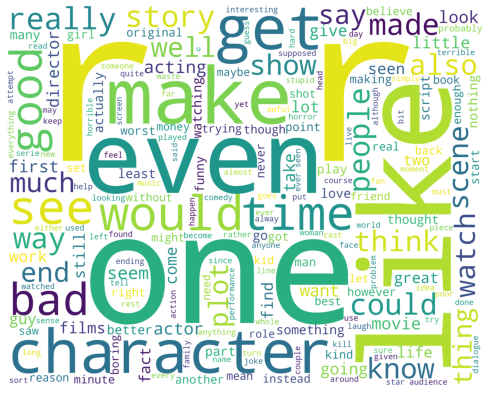

In [5]:
import nltk
nltk.download ('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[data['label']==1]
positivedata=positivedata['text']
negativedata=data[data['label']==0]
negativedata=negativedata['text']

def wordcloud_draw(data, color ='white'):
    words = ' '.join(data)
    cleaned_word=" ".join([word for word in words.split()
                          if (word != 'movie' and word != 'film')
                          ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negativedata)

### Now I will use the TF-IDF Vertorizer to convert the raw documents into feature matrix which is very important to train a Machine Learning model

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenizer_porter, use_idf=True)
y = data.label.values
x = tfidf.fit_transform(data.text)

# Training Machine Learning Model for Sentiment Analysis

Now to train a machine learning model I will split the data into 80 percent training and 20 percent test sets

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2, shuffle = False)

In [8]:
print(X_train) # To print data in X_train set

  (0, 30683)	0.11138428934066101
  (0, 19270)	0.10090223112286811
  (0, 27792)	0.07077085347024485
  (0, 55830)	0.18109510110078741
  (0, 50223)	0.3205762295760792
  (0, 27331)	0.13219127565340885
  (0, 36082)	0.154364144441481
  (0, 48117)	0.08965772563872118
  (0, 9313)	0.022164865421787316
  (0, 1663)	0.07643089301535558
  (0, 36540)	0.05385746664438657
  (0, 47955)	0.0823266151175583
  (0, 10731)	0.09151300348514566
  (0, 49445)	0.09280785715425537
  (0, 61641)	0.09041751569729309
  (0, 20951)	0.02521577970502479
  (0, 63157)	0.05945997731001462
  (0, 27443)	0.10721023886109005
  (0, 12705)	0.05429331619966283
  (0, 62172)	0.06356684221162226
  (0, 10772)	0.10037907362950661
  (0, 16353)	0.04761395461184227
  (0, 28590)	0.018733404906697847
  (0, 25663)	0.05984244457830232
  (0, 52391)	0.04700235408559672
  :	:
  (31999, 58357)	0.04417843673016793
  (31999, 2863)	0.05528381704771229
  (31999, 5214)	0.057200292690763974
  (31999, 46795)	0.07173711084668638
  (31999, 21703)	0.0313691

In [9]:
print(X_test) # To print data in X_test set

  (0, 62162)	0.17836829656777373
  (0, 5326)	0.11864793684590845
  (0, 60116)	0.25635731201885115
  (0, 64462)	0.10741545843822112
  (0, 47488)	0.3635089673742565
  (0, 20051)	0.09747067465721848
  (0, 52839)	0.08898660721515403
  (0, 54739)	0.10475684503490784
  (0, 44626)	0.10125254765381635
  (0, 21608)	0.12272881522154197
  (0, 30261)	0.10067596665927434
  (0, 12193)	0.08810943092042448
  (0, 12515)	0.07609469981584167
  (0, 45873)	0.0879785598844935
  (0, 48062)	0.06715307542308989
  (0, 41992)	0.06838435254748257
  (0, 51665)	0.06260969675358169
  (0, 40996)	0.07345185392434538
  (0, 56589)	0.09350892988240521
  (0, 54600)	0.10278971452999706
  (0, 29116)	0.07437585768751415
  (0, 27966)	0.07250117512870054
  (0, 21056)	0.0742627454495232
  (0, 63829)	0.07161470315626672
  (0, 37466)	0.09035967346908368
  :	:
  (7999, 19804)	0.07321834297826982
  (7999, 25363)	0.049353490875868815
  (7999, 57968)	0.07302175644899653
  (7999, 9313)	0.02959055804070893
  (7999, 20951)	0.03366359229

In [10]:
print(y_train) # To print data in y_train set

[0 0 0 ... 1 1 0]


In [11]:
print(y_test) # To print data in y_test set

[0 0 1 ... 0 1 1]


### Now let’s train a machine learning model for the task of sentiment analysis by using the Logistic Regression model

In [12]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=500).fit(X_train, y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  2.1min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.2min finished


Accuracy 0.90125
